In [87]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_dataframe = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
merged_dataframe.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [78]:
# Checking the number of mice.
total_schools = merged_dataframe['Mouse ID'].nunique()
print (total_schools)

{249}


In [11]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# Identify duplicate Mouse IDs based on Mouse ID and Timepoint
df = merged_dataframe
duplicate_mice = df[df.duplicated(['Mouse ID', 'Timepoint'])]['Mouse ID'].unique()

# Print the duplicate Mouse IDs
print(duplicate_mice)

['g989']


In [59]:
# Optional: Get all the data for the duplicate mouse ID. 
df = merged_dataframe
duplicate_mouse_ids = df[df.duplicated(['Mouse ID', 'Timepoint'])]['Mouse ID'].unique()

duplicate_mouse_data = df[df['Mouse ID'].isin(duplicate_mouse_ids)]

duplicate_mouse_data.head(len(duplicate_mouse_data))

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [15]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df = merged_dataframe

# Drop duplicate rows based on Mouse ID
clean_df = df.drop_duplicates(subset=['Mouse ID'])
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [16]:
# Checking the number of mice in the clean DataFrame.
num_mice = len(clean_df)
print(num_mice)

249


In [20]:
# Calculate mean, median, variance, standard deviation, and SEM of tumor volume for each regimen
df = merged_dataframe
summary_stats = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Rename columns
summary_stats.columns = ['Mean Tumor Volume', 'Median Tumor Volume	', 'Tumor Volume Variance', 'Tumor Volume Std. Dev.', 'Tumor Volume Std. Err.']

# Print the summary statistics table
summary_stats.head(len(summary_stats))

,Mean Tumor Volume,Median Tumor Volume\t,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [19]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
df = merged_dataframe

# Define the aggregation functions for each column
agg_functions = {'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']}

# Calculate summary statistics using the agg() method in a single line
summary_stats = df.groupby('Drug Regimen').agg(agg_functions)

# Rename columns and print results
summary_stats.columns = ['Mean', 'Median', 'Var', 'std', 'sem']
print("\033[1m{:>62}\033[0m".format('Tumor Volume (mm3)'))
summary_stats.head(len(summary_stats))

                                            Tumor Volume (mm3)


,Mean,Median,Var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


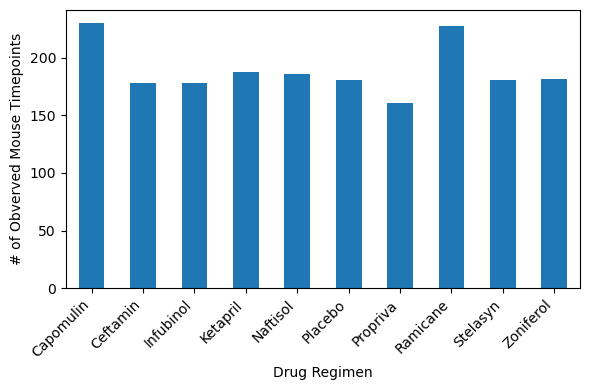

In [28]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
df = merged_dataframe
# Group the DataFrame by Drug Regimen and count the number of rows for each regimen
regimen_counts = df.groupby('Drug Regimen').size()

# Plot the bar plot
regimen_counts.plot(kind='bar', figsize=(6, 4))
#plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Obverved Mouse Timepoints')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjusts spacing to prevent clipping of labels
plt.show()

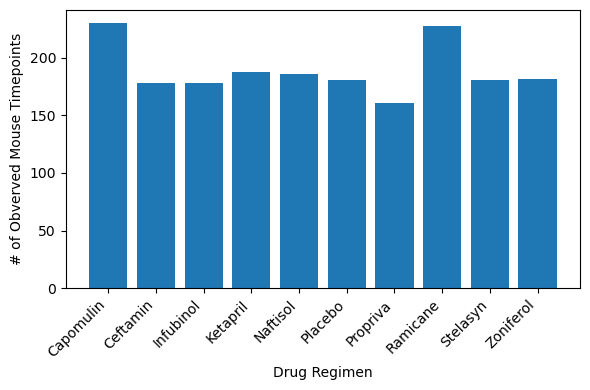

In [27]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
df = merged_dataframe
# Group the DataFrame by Drug Regimen and count the number of rows for each regimen
regimen_counts = df.groupby('Drug Regimen').size()

# Extract the x and y values for the bar plot
x_values = regimen_counts.index
y_values = regimen_counts.values

# Create a bar plot using pyplot
plt.figure(figsize=(6, 4))
plt.bar(x_values, y_values)
#plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Obverved Mouse Timepoints')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjusts spacing to prevent clipping of labels
plt.show()

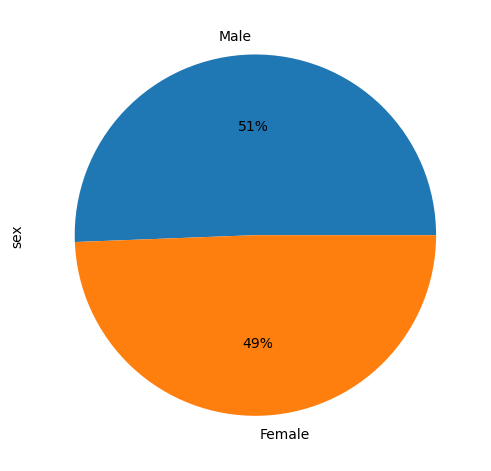

In [42]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
df = merged_dataframe

# Calculate the number of female and male mice
gender_counts = df['Sex'].value_counts()

# Create a pie plot using pandas
gender_counts.plot(kind='pie', figsize=(5, 5), autopct='%1.0f%%', startangle=0)
#plt.title('Distribution of Female versus Male Mice')
plt.ylabel('sex')  # the y-axis label
plt.tight_layout()  # Adjusts spacing to prevent clipping of labels
plt.show()

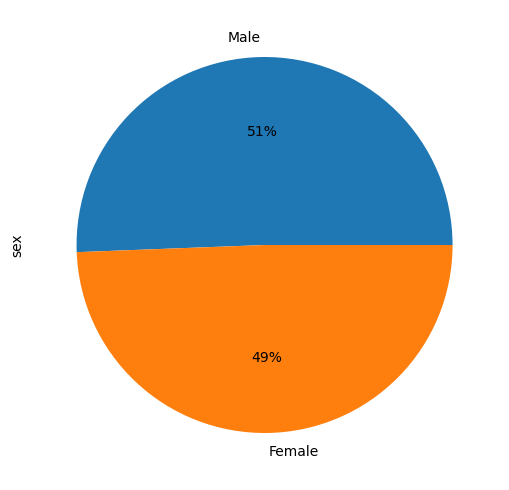

In [40]:
#Generate a pie plot showing the distribution of female versus male mice using pyplot
df = merged_dataframe

# Calculate the number of female and male mice
gender_counts = df['Sex'].value_counts()

# Create a pie plot using pyplot
plt.figure(figsize=(5, 5))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.0f%%', startangle=0)
#plt.title('Distribution of Female versus Male Mice')
plt.tight_layout()  # Adjusts spacing to prevent clipping of labels
plt.ylabel('sex')  # the y-axis label
plt.show()


In [88]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

df = merged_dataframe
# Filter the DataFrame to include only the specified treatment regimens
selected_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_df = df[df['Drug Regimen'].isin(selected_regimens)]

# Get the last (greatest) timepoint for each mouse
last_timepoints = filtered_df.groupby('Mouse ID')['Timepoint'].max()

# Merge the last timepoints with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(last_timepoints, df, on=['Mouse ID', 'Timepoint'])

# Filter the merged DataFrame to include only the necessary columns
final_tumor_volume = merged_df[['Mouse ID', 'Timepoint', 'Drug Regimen', 'Tumor Volume (mm3)']]

# Print or use final_tumor_volume for further analysis
print("Final Tumor Volume for each mouse across specified treatment regimens:")
print(final_tumor_volume)

Final Tumor Volume for each mouse across specified treatment regimens:
   Mouse ID  Timepoint Drug Regimen  Tumor Volume (mm3)
0      a203         45    Infubinol           67.973419
1      a251         45    Infubinol           65.525743
2      a275         45     Ceftamin           62.999356
3      a411         45     Ramicane           38.407618
4      a444         45     Ramicane           43.047543
..      ...        ...          ...                 ...
95     y769         45     Ceftamin           68.594745
96     y793         45    Capomulin           31.896238
97     y865         45     Ceftamin           64.729837
98     z578         45     Ramicane           30.638696
99     z581         45    Infubinol           62.754451

[100 rows x 4 columns]


In [89]:
df = final_tumor_volume

# List of treatments for the for loop and plot labels
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Empty list to fill with tumor volume data
tumor_vol_data = []

# Calculate the IQR and determine potential outliers for each treatment
for treatment in treatments:
    # Filter the DataFrame for the current treatment
    treatment_df = df[df['Drug Regimen'] == treatment]
    
    # Get the tumor volumes for the current treatment
    tumor_volumes = treatment_df['Tumor Volume (mm3)']
    
    # Add the tumor volumes to the tumor_vol_data list
    tumor_vol_data.append(tumor_volumes)
    
    # Calculate the quartiles and IQR
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    # Determine the lower and upper bounds for potential outliers
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    
    # Determine potential outliers for the current treatment
    outliers = treatment_df[(treatment_df['Tumor Volume (mm3)'] < lower_bound) | 
                            (treatment_df['Tumor Volume (mm3)'] > upper_bound)]
    
    # Print the treatment, quartiles, IQR, lower bound, upper bound, and potential outliers
    #print(f'{treatment}\'s potential outliers:') 
    #print(f'Lower Quartile: {lower_quartile}')
    #print(f'Upper Quartile: {upper_quartile}')
    #print(f'IQR: {iqr}')
    #print(f'Lower Bound: {lower_bound}')
    #print(f'Upper Bound: {upper_bound}')
    #print('Potential Outliers:')
    #print(outliers)
    #print('\n')
    print(f"{treatment}'s potential outliers:{outliers['Tumor Volume (mm3)']}")    

Capomulin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers:15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)


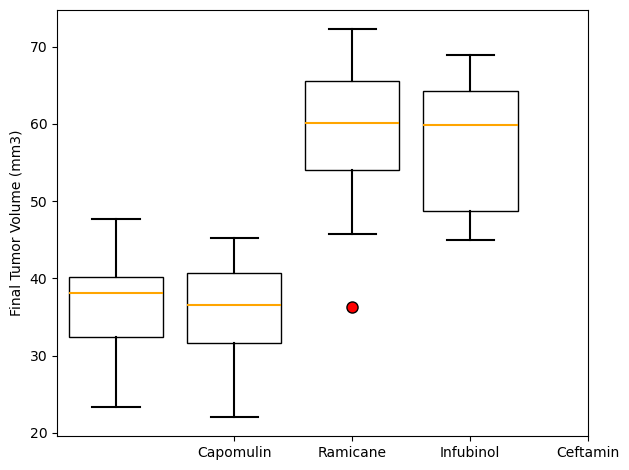

In [120]:
# Create a DataFrame from the tumor volume data
df_boxplot = pd.DataFrame(tumor_vol_data).T  # Transpose the list of lists

# Assign column names to the DataFrame based on treatments
df_boxplot.columns = treatments

# Generate box plot
sns.boxplot(data=df_boxplot,color='black',flierprops=dict(marker='o', markerfacecolor='r', markersize=8, linestyle='-'), boxprops=dict(linewidth=1, facecolor='white',linestyle='-'), medianprops=dict(color='orange'))
plt.title('')
plt.xlabel('')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks(range(1, len(treatments) + 1), treatments)  # Set x-axis tick labels
plt.tight_layout()  # Adjusts spacing to prevent clipping of labels
plt.show()

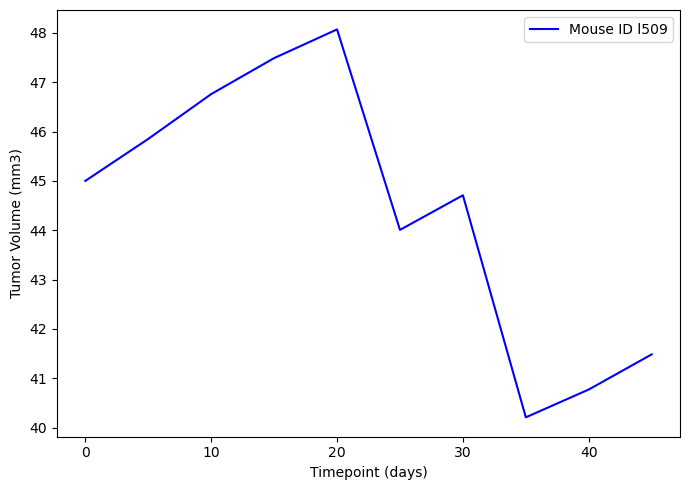

In [129]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
df = merged_dataframe

# Filter the DataFrame to include only the Capomulin regimen
capomulin_df = df[df['Drug Regimen'] == 'Capomulin']

# Choose a single mouse ID treated with Capomulin
mouse_id = 'l509'
mouse_data = capomulin_df[capomulin_df['Mouse ID'] == mouse_id]

# Plot tumor volume vs. time point for the selected mouse using a line plot
plt.figure(figsize=(7, 5))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='', color='b', label=f'Mouse ID {mouse_id}')
#plt.title(f'Tumor Volume vs. Time Point for Mouse ID {mouse_id} (Capomulin)')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()

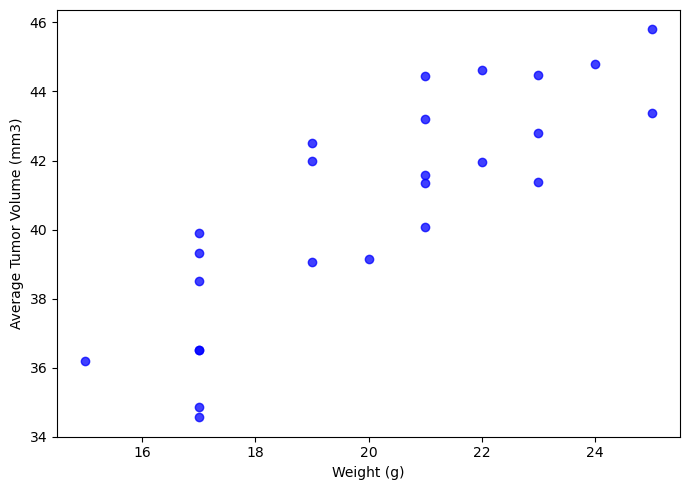

In [131]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
df = merged_dataframe

# Filter the DataFrame to include only the Capomulin regimen
capomulin_df = df[df['Drug Regimen'] == 'Capomulin']

# Group the data by Mouse ID and calculate the average tumor volume and weight for each mouse
grouped_data = capomulin_df.groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'mean'})

# Create a scatter plot of mouse weight vs. average tumor volume
plt.figure(figsize=(7, 5))
plt.scatter(grouped_data['Weight (g)'], grouped_data['Tumor Volume (mm3)'], color='b', alpha=0.75)
#plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(False)
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


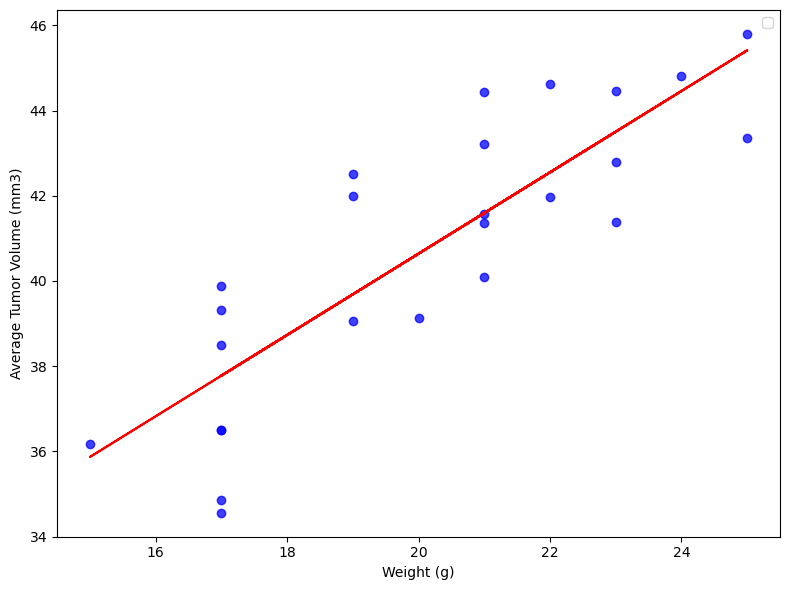

In [137]:
from scipy.stats import linregress

df = merged_dataframe

# Filter the DataFrame to include only the Capomulin regimen
capomulin_df = df[df['Drug Regimen'] == 'Capomulin']

# Group the data by Mouse ID and calculate the average tumor volume and weight for each mouse
grouped_data = capomulin_df.groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'mean'})

# Calculate the correlation coefficient
correlation_coefficient = grouped_data['Weight (g)'].corr(grouped_data['Tumor Volume (mm3)'])

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(grouped_data['Weight (g)'], grouped_data['Tumor Volume (mm3)'])

# Create a scatter plot of mouse weight vs. average tumor volume
plt.figure(figsize=(8, 6))
# plt.scatter(grouped_data['Weight (g)'], grouped_data['Tumor Volume (mm3)'], color='b', alpha=0.75, label='Data Points')
plt.scatter(grouped_data['Weight (g)'], grouped_data['Tumor Volume (mm3)'], color='b', alpha=0.75, label='')
#plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
#plt.grid(True)

# Add the linear regression line to the plot
# plt.plot(grouped_data['Weight (g)'], slope * grouped_data['Weight (g)'] + intercept, color='r', label='Linear Regression')
plt.plot(grouped_data['Weight (g)'], slope * grouped_data['Weight (g)'] + intercept, color='r', label='_')
plt.legend()

# Annotate the plot with correlation coefficient and regression equation
#plt.annotate(f'Correlation Coefficient: {correlation_coefficient:.2f}', (20, 38), fontsize=12)
#plt.annotate(f'Regression Equation: y = {slope:.2f}x + {intercept:.2f}', (20, 36), fontsize=12)

plt.tight_layout()
plt.show()